In [1]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'

from scipy.stats import norm

# DAG examples



## Minimal Example

A simple causal relation, $Y$ being causally affected by $T$:

$T \rightarrow Y$

[2.98906654 0.06085927]
[1.82857271e-146 2.70389709e-008]


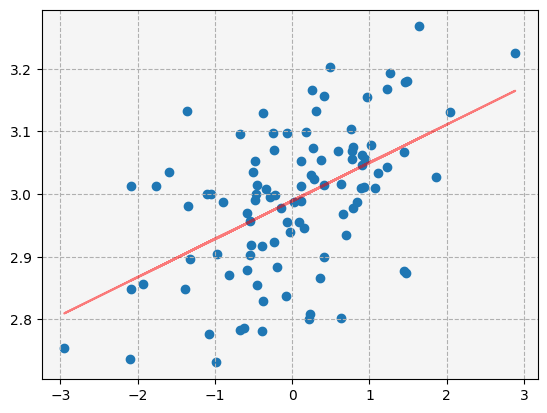

In [2]:
t = norm(0, 1).rvs(100)
y = 3 + 0.05 * t + norm(0, 0.1).rvs(100)

mod = sm.OLS(y, sm.add_constant(t)).fit()
print(mod.params)
print(mod.pvalues)

fig, ax = plt.subplots()
ax.scatter(t, y)
ax.plot(t, mod.predict(sm.add_constant(t)), color='red', alpha=.5)
plt.show()

## Minimal Mediator

$T \rightarrow M \rightarrow Y$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5541.
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          1.03e-100
Time:                        09:56:16   Log-Likelihood:                 92.333
No. Observations:                 100   AIC:                            -178.7
Df Residuals:                      97   BIC:                            -170.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1932      0.091     13.111      0.0

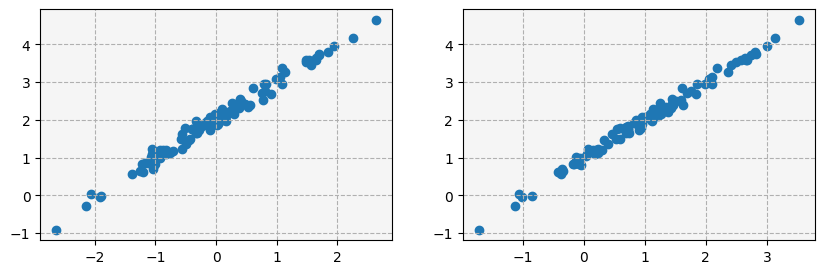

In [3]:
t = norm(0, 1).rvs(100)
m = 1 + t + norm(0, 0.1).rvs(100)
y = 1 + m + norm(0, 0.1).rvs(100)

X1 = sm.add_constant(np.array([t, m]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(t, y)
ax[1].scatter(m, y)

plt.show()

Correct model should be regressing $Y$ on $T$, ignoring $M$

## Mediator with additional cause

$T \rightarrow M \rightarrow Y$

$X \rightarrow M$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.248e+06
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          3.85e-240
Time:                        09:56:16   Log-Likelihood:                 317.18
No. Observations:                 100   AIC:                            -626.4
Df Residuals:                      96   BIC:                            -615.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1715      0.108     10.864      0.0

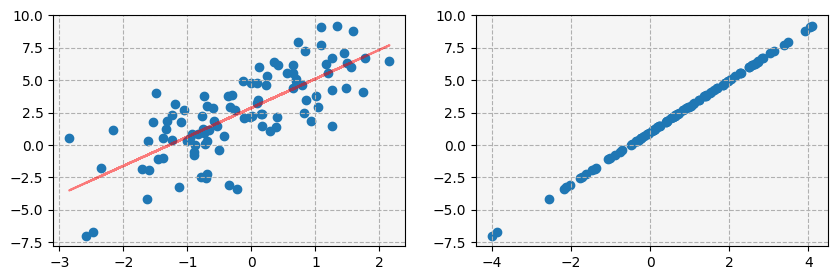

In [4]:
t = norm(0, 1).rvs(100)
x = norm(0, 1).rvs(100)
m = 1 + t + x + norm(0, 0.01).rvs(100)
y = 1 + 2 * m + norm(0, 0.01).rvs(100)
# -> y = 2 + t + x + noise

X1 = sm.add_constant(np.array([t, m, x]).T)
X2 = sm.add_constant(t)
X3 = sm.add_constant(np.array([t, x]).T)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

mod3 = sm.OLS(y, X3).fit()
print(mod3.summary())

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(t, y)
ax[0].plot(t, mod2.predict(X2), color='red', alpha=.5)
ax[1].scatter(m, y)

plt.show()

Correct Model should be regressing $Y$ on $T$ and $X$, ignoring $M$.

## Minimal Collider

$T \rightarrow Y$

$T \rightarrow C \leftarrow Y$

In [5]:
t = norm(0, 1).rvs(100)
y = 1 + t + norm(0, 1).rvs(100)
c = t + y + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, c]).T)
X2 = sm.add_constant(t)

mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     151.9
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.31e-30
Time:                        09:56:16   Log-Likelihood:                -120.61
No. Observations:                 100   AIC:                             247.2
Df Residuals:                      97   BIC:                             255.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5640      0.094      6.024      0.0

nicely illustrates how controlling for the collider breaks the causal analysis

## Collider plus

$T \rightarrow Y$

$T \rightarrow C \leftarrow A \rightarrow Y$

$ C \rightarrow Y$




In [18]:
t = norm(0, 1).rvs(100)
a = norm(0, 1).rvs(100)
c = t + a + norm(0, 1).rvs(100)
y = 1 + t + a + c + norm(0, 1).rvs(100)

X1 = sm.add_constant(np.array([t, a]).T)
X2 = sm.add_constant(t)
X3 = sm.add_constant(np.array([t, c, a]).T)
X4 = sm.add_constant(np.array([t, c]).T)


mod1 = sm.OLS(y, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(y, X2).fit()
print(mod2.summary())

mod3 = sm.OLS(y, X3).fit()
print(mod3.summary())

mod4 = sm.OLS(y, X4).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     287.1
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.79e-41
Time:                        10:16:56   Log-Likelihood:                -167.74
No. Observations:                 100   AIC:                             341.5
Df Residuals:                      97   BIC:                             349.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0688      0.132      8.086      0.0

Controlling for $T, C, A$ is the correct way